In [4]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
LMK_PTH = "/home/alma/w-projects/ccf/rsc/ref/reference_landmarks.tsv"
IMG_PTH = "/home/alma/w-projects/ccf/rsc/ref/mob-detailed.png"

In [11]:
img = Image.open(IMG_PTH)#.convert("L") 
w,h = img.size
new_w = 500
w_ratio = new_w/w
new_h = int(h * w_ratio)
img = img.resize((new_w,new_h))
img = np.asarray(img)
#lmk = pd.read_csv(LMK_PTH,sep = "\t",header = 0,index_col = 0)
#lmk.iloc[:,:] = lmk.iloc[:,:] * 11.5

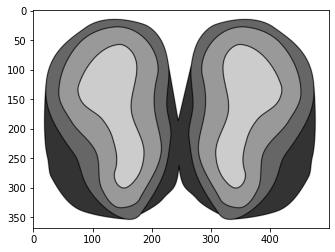

In [12]:
plt.imshow(img)
plt.show()

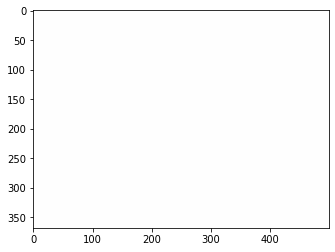

In [10]:
img = img / 255
img[img >= 0.5] = 1
img[img < 0.5] = 0
img = img.astype(np.int)
plt.imshow(img)
plt.show()

In [146]:
f_ref = (1-img).sum() / (img.shape[0] * img.shape[1])
f_ratio = img.shape[1] / img.shape[0]
print(f_ref,xy_ratio)

0.6489560117302052 1.4631941455015067


In [147]:
n_in_points = 100
n_points = n_in_points / f_ref

size_x= np.sqrt(n_points / f_ratio)
size_y = size_x * f_ratio

xx = np.linspace(0,img.shape[0],int(size_x))
yy = np.linspace(0,img.shape[1],int(size_y))

xx,yy = np.meshgrid(xx,yy)
#xx = xx.flatten()
#yy = yy.flatten()
crd = np.hstack((xx.flatten()[:,np.newaxis],yy.flatten()[:,np.newaxis]))

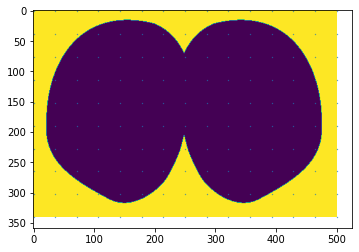

In [148]:
plt.imshow(img)

plt.scatter(crd[:,1],crd[:,0],s = 0.1)
plt.show()

In [149]:
img_x = np.arange(img.shape[0])
img_y = np.arange(img.shape[1])
img_xx,img_yy = np.meshgrid(img_x,img_y)
img_xx = img_xx.flatten()
img_yy = img_yy.flatten()
img_crd = np.hstack((img_xx[:,np.newaxis],img_yy[:,np.newaxis]))

In [150]:
from scipy.interpolate import interp2d,griddata
#griddata(points, values, (grid_x, grid_y), method='nearest')
zz = griddata(img_crd,img.T.flatten(),(xx,yy))
#zz = inter(xx.flatten(),yy.flatten())

In [151]:
crd.shape

(150, 2)

In [152]:
crd = crd[zz.flatten() < 0.5]

(-0.5, 499.5, 340.5, -0.5)

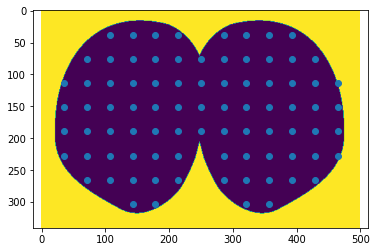

In [153]:
plt.imshow(img)
plt.scatter(crd[:,1],crd[:,0])
plt.axis("equal")

In [154]:
crd.shape

(84, 2)

In [13]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

import anndata as ad
import pandas as pd
import sys

module_pth = "/home/alma/w-projects/ccf/src"
if module_pth not in sys.path:
    sys.path.append(module_pth)
    

In [14]:
import preprocess as pp

In [15]:
TEST_PTH = "/home/alma/w-projects/ccf/rsc/ref/mob-detailed.png"

In [49]:
img = Image.open(TEST_PTH)

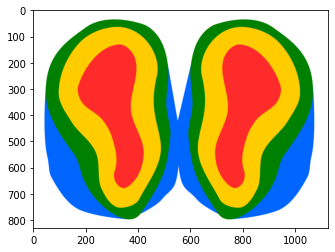

In [50]:
plt.imshow(img)

In [55]:
crd,meta = pp.reference_to_grid(img,n_approx_points=1000,
                           background_color="white",
                           n_regions=4,
                           )

(2.6186046511627907, 1097.1953488372092, 15.581024999999997, 815.406975)

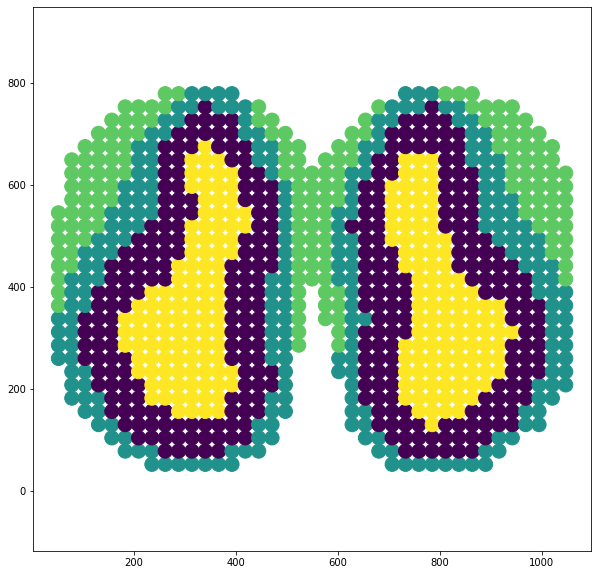

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(crd[:,0],crd[:,1],s = 200,c = meta)
plt.axis("equal")